# 1. Import RxnInsights

In [1]:
from rxn_insight.reaction import *

# 2. Load sample dataset

In [2]:
df = pd.read_parquet("data/flow_database.gzip")
df.head(1)

,REACTION,MAPPED_REACTION,SOLVENT,REAGENT,CATALYST,N_REACTANTS,N_PRODUCTS,FG_REACTANTS,FG_PRODUCTS,PR_RINGS,...,NAME,REF,TAG,WOS ID,DOI,AUTHORS,TITLE,JOURNAL,YEAR,TAG2
INDEX,,,,,,,,,,,,,,,,,,,,,
0,Cc1ccc(OS(=O)(=O)C(F)(F)F)cc1.O=C(O)c1ccccc1[N...,O=S(=O)(O[c:5]1[cH:4][cH:3][c:2]([CH3:1])[cH:1...,CN1CCCC1=O,CC(C)(C)O.[K],CC(=O)O.[Pd].3375-31-3.33989-10-5.33989-10-5,2,1,Triflate.Carboxylic acid,None,c1ccccc1.c1ccccc1,...,OtherReaction,"Chemical Communications (Cambridge, United Kin...",4de5fbb3a641c792751b978154deb99cc14bee280e243c...,WOS:000288085600090,10.1039/c0cc05708h,"Lange, PP; Goossen, LJ; Podmore, P; Underwood,...",Decarboxylative biaryl synthesis in a continuo...,CHEMICAL COMMUNICATIONS,2011,d8b4eba39e6dcaf21d41e041faa97ad113cb9ce3deb073...


In [3]:
r = "N#Cc1ccccc1c2ccccc2>>c3ccc(c1ccccc1c2nnn[nH]2)cc3"

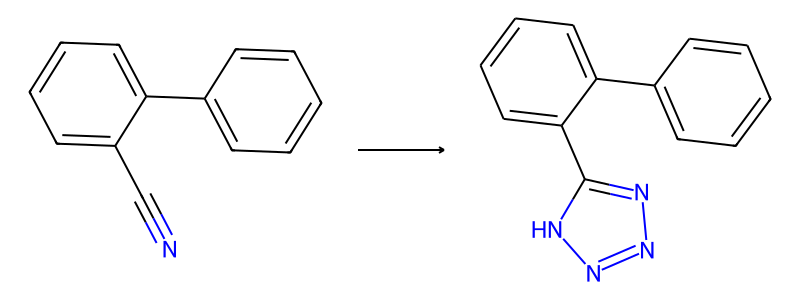

In [4]:
display(SVG(draw_chemical_reaction(r)))

In [5]:
rxn = Reaction(r)

In [6]:
rxn.get_reaction_info()

{'REACTION': 'N#Cc1ccccc1-c1ccccc1>>c1ccc(-c2ccccc2-c2nnn[nH]2)cc1',
 'MAPPED_REACTION': '[cH:1]1[cH:2][cH:3][c:4](-[c:5]2[cH:6][cH:7][cH:8][cH:9][c:10]2[C:11]#[N:12])[cH:16][cH:17]1>>[cH:1]1[cH:2][cH:3][c:4](-[c:5]2[cH:6][cH:7][cH:8][cH:9][c:10]2-[c:11]2[n:12][n:13][n:14][nH:15]2)[cH:16][cH:17]1',
 'N_REACTANTS': 1,
 'N_PRODUCTS': 1,
 'FG_REACTANTS': ('Nitrile',),
 'FG_PRODUCTS': (),
 'PARTICIPATING_RINGS_REACTANTS': (),
 'PARTICIPATING_RINGS_PRODUCTS': ('c1nnn[nH]1',),
 'ALL_RINGS_PRODUCTS': ('c1ccccc1', 'c1ccccc1', 'c1nnn[nH]1'),
 'BY-PRODUCTS': ('Other',),
 'CLASS': 'Aromatic Heterocycle Formation',
 'TAG': '237b84aaa459abf427f233dc6a07a1d9de824f980714e458423189bb68f60f12',
 'SOLVENT': ('',),
 'REAGENT': ('',),
 'CATALYST': ('',),
 'REF': '',
 'NAME': 'Azide-nitrile click cycloaddition to tetrazole',
 'SCAFFOLD': 'c1ccc(-c2ccccc2-c2nnn[nH]2)cc1'}

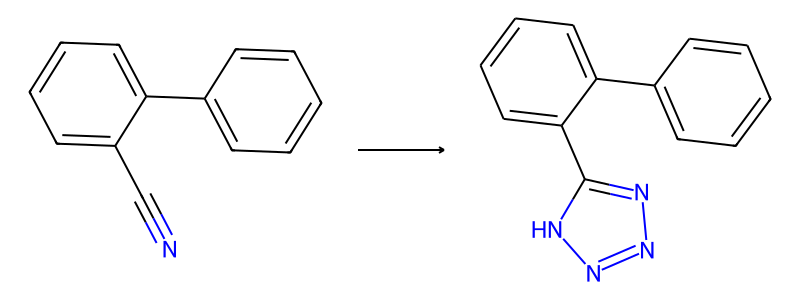

In [7]:
display(SVG(draw_chemical_reaction(r)))

In [8]:
mp=rxn.classifier.mol_product

In [9]:
mp=Chem.MolFromSmiles(rxn.classifier.products)

In [10]:
rxn.classifier.products

'[cH:1]1[cH:2][cH:3][c:4](-[c:5]2[cH:6][cH:7][cH:8][cH:9][c:10]2-[c:11]2[n:12][n:13][n:14][nH:15]2)[cH:16][cH:17]1'

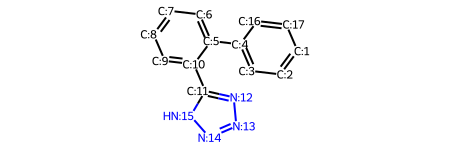

In [11]:
rxn.classifier.product_mols[0]

In [12]:
rxn.classifier.product_map_dict

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16}

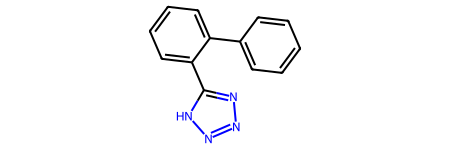

In [13]:
rxn.classifier.mol_product

In [14]:
for atom in mp.GetAtoms():
    print(atom.GetAtomMapNum())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


df["TAG2"] = ""
rxn_mapper = RXNMapper()
for i in tqdm(df.index):
    r = df["MAPPED_REACTION"][i]
    rxn = Reaction(reaction=r, keep_mapping=True, rxn_mapper=rxn_mapper)
    ri = rxn.get_reaction_info()
    df.loc[i, "TAG2"] = rxn.give_broad_tag()

df.to_parquet("data/flow_database.gzip")

df.to_excel("data/flow_database.xlsx")

In [8]:
rxn.suggest_conditions(df)

Calculating Tanimoto similarity: 100%|████████████████████████████████████████████| 109/109 [00:00<00:00, 54484.46it/s]

Reaction found with similarity of 1.000. This will be our best match.


{'Solvent': 'CN1CCCC1=O.O',
 'Catalyst': '',
 'Reagent': 'CC(=O)O.[N-]=[N+]=N[Na].O=C(O)O.[Na].O=NO.[Na].Cl'}

## 6.1 Show ranking of reagents

In [15]:
Reaction("CC(=O)OC(C)=O.O=C(O)c1ccccc1O>>CC(=O)Oc1ccccc1C(=O)O")

In [12]:
import rdkit

In [14]:
print(rdkit.__version__)

2022.09.4


In [9]:
rxn.suggested_solvent

,NAME,COUNT
6,CN1CCCC1=O.O,46
1,CC(C)=O.CCOC(C)=O.O,17
2,CC(=O)O.CN1CCCC1=O.O,16
4,Cc1ccccc1,9
0,C1COCCO1,3
3,CN(C)C=O,1
5,CO.O,1


In [10]:
rxn.suggested_catalyst

,NAME,COUNT
0,,61
3,CCCC[Sn](CCCC)(CCCC)N=[N+]=[N-].17846-68-3.pol...,17
1,[Br-].[Br-].[Zn+2].7699-45-8,12
2,818-08-6.818-08-6,3


In [11]:
rxn.suggested_reagent

,NAME,COUNT
2,CC(=O)O.[N-]=[N+]=N[Na].O=C(O)O.[Na].O=NO.[Na].Cl,18
1,CC(=O)O.[N-]=[N+]=N[Na],17
6,C[Si](C)(C)N=[N+]=[N-].O[Na].Cl,17
3,[N-]=[N+]=N[Na].O=NO.[Na].O=S(=O)(O)O,15
0,CC(=O)O.[N-]=[N+]=N[Na].O=NO.[Na].Cl,12
5,554-68-7.[N-]=[N+]=N[Na],10
7,C[Si](C)(C)N=[N+]=[N-],3
4,149-44-0,1
